In [239]:

## import all packages as needed
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import numpy as np
rcParams['figure.figsize'] = 12,5
rcParams['axes.labelsize']= 14
rcParams['xtick.labelsize'] =12
rcParams['ytick.labelsize'] = 12 


In [245]:
## read the data in pandas
base_data = ""
#base_data = pd.read_csv("C:\\Users\paperspace\Downloads\dataset\SouthGermanCredit.asc",sep=" ")
base_data = pd.read_csv("https://raw.githubusercontent.com/akagrawal1-git/ashish-repo/master/DL/SouthGermanCreditRisk/SouthGermanCredit.asc",sep=" ")
base_data.columns

Index(['status', 'duration', 'credit_history', 'verw', 'hoehe', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb',
       'kredit'],
      dtype='object')

In [246]:
## change the data column to english
base_data.rename(columns={'verw':"purpose", 'hoehe':"amount", 'sparkont':"savings",
       'beszeit':"employment_duration", 'rate':"installment_rate", 'famges':"personal_status_sex", 'buerge':"other_debtors", 'wohnzeit':"present_residence", 'verm':"property", 'alter':"age",
       'weitkred':"other_installment_plans", 'wohn':"housing", 'bishkred':"number_credits", 'beruf':"job", 'pers':"people_liable", 'telef':"telephone", 'gastarb':"foreign_worker",
       'kredit':"credit_risk"}, inplace =True)
base_data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [247]:
## analyze data to see null values 
print("null columns", base_data.isnull().sum())
base_data.info()



null columns status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64

In [248]:
## analyze the data
base_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
status,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_history,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
employment_duration,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
personal_status_sex,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
other_debtors,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


c:\users\paperspace\anaconda3\envs\tensor2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='credit_risk', ylabel='count'>

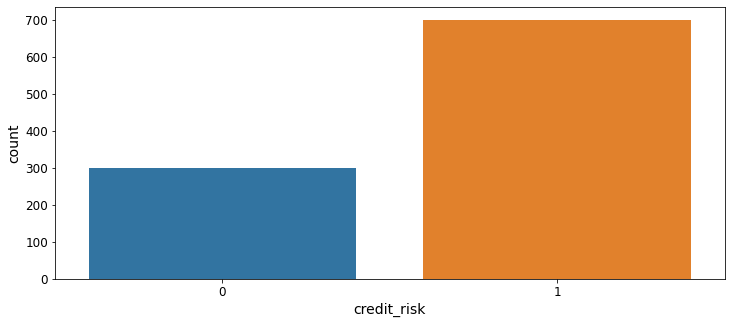

In [249]:
sns.countplot(base_data['credit_risk'])

c:\users\paperspace\anaconda3\envs\tensor2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='foreign_worker', ylabel='count'>

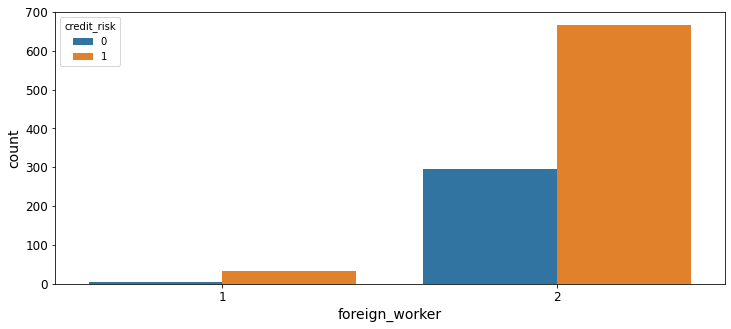

In [250]:
sns.countplot(base_data['foreign_worker'],hue=base_data['credit_risk'])

In [251]:
base_data['log_amount'] = round(np.log(base_data['amount']),2)
base_data.drop('amount',axis=1,inplace=True)
base_data['log_age'] =  round(np.log(base_data['age']),2)
base_data['log_duration'] = round(np.log(base_data['duration']),2)
base_data.drop(['age','duration'],axis=1,inplace=True)

In [252]:
base_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
status,1000.0,2.57700,1.257638,1.00,1.00,2.00,4.00,4.00
credit_history,1000.0,2.54500,1.083120,0.00,2.00,2.00,4.00,4.00
purpose,1000.0,2.82800,2.744439,0.00,1.00,2.00,3.00,10.00
savings,1000.0,2.10500,1.580023,1.00,1.00,1.00,3.00,5.00
employment_duration,1000.0,3.38400,1.208306,1.00,3.00,3.00,5.00,5.00
installment_rate,1000.0,2.97300,1.118715,1.00,2.00,3.00,4.00,4.00
personal_status_sex,1000.0,2.68200,0.708080,1.00,2.00,3.00,3.00,4.00
other_debtors,1000.0,1.14500,0.477706,1.00,1.00,1.00,1.00,3.00
present_residence,1000.0,2.84500,1.103718,1.00,2.00,3.00,4.00,4.00
property,1000.0,2.35800,1.050209,1.00,1.00,2.00,3.00,4.00


In [253]:
#noramlize the data to ranges between 0 and 1

print("*"*20,"before normalization","*"*20)
# before data normalization
for i in range(len(base_data.columns)):
    print("column ",base_data.columns[i] ,base_data.iloc[:,i].min(), "-",base_data.iloc[:,i].max())

normalized_data=(base_data-base_data.min())/(base_data.max()-base_data.min())
#normalized_data=base_data

print("*"*20,"after normalization","*"*20)
# after data normalization
for i in range(len(normalized_data.columns)):
    print("before ",base_data.columns[i] ,base_data.iloc[:,i].min(), "-",base_data.iloc[:,i].max(),"after ",normalized_data.columns[i] ,normalized_data.iloc[:,i].min(), "-",normalized_data.iloc[:,i].max())


******************** before normalization ********************
column  status 1 - 4
column  credit_history 0 - 4
column  purpose 0 - 10
column  savings 1 - 5
column  employment_duration 1 - 5
column  installment_rate 1 - 4
column  personal_status_sex 1 - 4
column  other_debtors 1 - 3
column  present_residence 1 - 4
column  property 1 - 4
column  other_installment_plans 1 - 3
column  housing 1 - 3
column  number_credits 1 - 4
column  job 1 - 4
column  people_liable 1 - 2
column  telephone 1 - 2
column  foreign_worker 1 - 2
column  credit_risk 0 - 1
column  log_amount 5.52 - 9.82
column  log_age 2.94 - 4.32
column  log_duration 1.39 - 4.28
******************** after normalization ********************
before  status 1 - 4 after  status 0.0 - 1.0
before  credit_history 0 - 4 after  credit_history 0.0 - 1.0
before  purpose 0 - 10 after  purpose 0.0 - 1.0
before  savings 1 - 5 after  savings 0.0 - 1.0
before  employment_duration 1 - 5 after  employment_duration 0.0 - 1.0
before  installment_

In [254]:
normalized_data = normalized_data.sample(frac = 1)
normalized_data["credit_risk"].tail(20)

348    1.0
169    1.0
13     1.0
253    1.0
304    0.0
648    1.0
421    1.0
889    0.0
38     1.0
616    1.0
955    0.0
909    0.0
42     1.0
78     1.0
997    0.0
174    1.0
839    0.0
494    1.0
689    0.0
835    0.0
Name: credit_risk, dtype: float64

In [255]:
# Shuffle the normalized data
normalized_data = normalized_data.sample(frac = 1)

## divide the data into X and Y
Y = normalized_data["credit_risk"]
X = normalized_data.drop("credit_risk", axis=1)
Y.tail(20)

463    0.0
56     1.0
46     1.0
903    0.0
985    0.0
497    1.0
991    0.0
567    1.0
457    1.0
75     1.0
424    1.0
149    1.0
97     0.0
388    1.0
270    1.0
416    1.0
892    0.0
190    1.0
763    0.0
919    0.0
Name: credit_risk, dtype: float64

In [256]:
## divide the data into train and test
test_ratio = 0.3
data_size = len(X)
X,Y
train_x  = X.iloc[:int(data_size*(1-test_ratio)),:]
test_x =   X.iloc[int(data_size*(1-test_ratio)):]

#len(Y)
train_y  = Y.iloc[:int(data_size*(1-test_ratio))]
test_y =   Y.iloc[int(data_size*(1-test_ratio)):]

print(len(train_x),len(test_x),len(train_y),len(test_y),len(X),len(Y))

700 300 700 300 1000 1000


In [257]:
# convert pandas to numpy array
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
test_x = test_x.to_numpy()
test_y = test_y.to_numpy()

In [258]:

## define a tensorflow architecture

creditriskmodel1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(516,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(200,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(2,activation=tf.nn.softmax)
])


In [259]:
## compile the model
optimiser = tf.keras.optimizers.Adam()
creditriskmodel1.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [260]:
epochs=40
batch_size = 32
## train the model to get 95% accuracy
creditriskmodel1.fit(train_x, train_y, batch_size=batch_size, epochs=epochs)

Train on 700 samples
Epoch 1/40
700/700 [==============================] - 1s 1ms/sample - loss: 0.6132 - accuracy: 0.6886
Epoch 2/40
700/700 [==============================] - 0s 221us/sample - loss: 0.5798 - accuracy: 0.7029
Epoch 3/40
700/700 [==============================] - 0s 196us/sample - loss: 0.5470 - accuracy: 0.7157
Epoch 4/40
700/700 [==============================] - 0s 233us/sample - loss: 0.5386 - accuracy: 0.7114
Epoch 5/40
700/700 [==============================] - 0s 221us/sample - loss: 0.5421 - accuracy: 0.7129
Epoch 6/40
700/700 [==============================] - 0s 196us/sample - loss: 0.5295 - accuracy: 0.7143
Epoch 7/40
700/700 [==============================] - 0s 190us/sample - loss: 0.5230 - accuracy: 0.7143
Epoch 8/40
700/700 [==============================] - 0s 240us/sample - loss: 0.5134 - accuracy: 0.7414
Epoch 9/40
700/700 [==============================] - 0s 226us/sample - loss: 0.5034 - accuracy: 0.7329
Epoch 10/40
700/700 [========================

In [261]:
## evaluate the accurancy on test data
creditriskmodel1.evaluate(test_x, test_y)

300/300 [==============================] - 0s 580us/sample - loss: 0.6169 - accuracy: 0.7367


[0.6168680727481842, 0.7366667]